In [52]:
import pdfplumber
import pandas as pd
import re
import os
from datetime import datetime
import numpy as np

# Function to standardize date formats
def standardize_date(date_str):
    formats = ["%d.%m.%y", "%d-%b-%y", "%d/%m/%Y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt).strftime("%Y-%m-%d")
        except ValueError:
            continue
    return None  # Return None if no format matches

# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/raw_pdfs"

# List to store extracted data
data = []

# List to store unprocessed lines
unprocessed = []

# Process each PDF in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing: {pdf_file}")

        # Open the PDF
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):
                text = page.extract_text()
                if text:  # Check if text was extracted
                    print(f"Page {page_number} of file {pdf_file} processed.")
                    # Split the text into lines
                    for line in text.split("\n"):
                        # Adjusted pattern to extract date, description, additional code, and amount
                        match = re.match(r"(\d{2}\.\d{2}\.\d{2})\s+\S+\s+(.+?)\s+(\d{8,})?\s*([\d.,]+)$", line)
                        if match:
                            fecha, descripcion, codigo_adicional, monto = match.groups()
                            # Standardize the date
                            standardized_date = standardize_date(fecha)
                            if standardized_date:
                                # Replace commas with dots in the amount
                                monto = float(monto.replace(".", "").replace(",", "."))
                                data.append({
                                    "Date": standardized_date,
                                    "Description": descripcion,
                                    "Additional Code": codigo_adicional if codigo_adicional else "N/A",
                                    "Amount": monto,
                                    "File Name": pdf_file  # Add the file name
                                })
                            else:
                                unprocessed.append(f"{line} (File: {pdf_file})")  # Store lines with invalid dates
                        else:
                            unprocessed.append(f"{line} (File: {pdf_file})")  # Store unprocessed lines

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data.csv"
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

# Save unprocessed lines to a log file
unprocessed_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/unprocessed_lines.txt"
with open(unprocessed_path, "w") as f:
    for line in unprocessed:
        f.write(line + "\n")
print(f"Unprocessed lines saved to {unprocessed_path}")


Processing: visa 07 24.pdf
Page 1 of file visa 07 24.pdf processed.
Page 2 of file visa 07 24.pdf processed.
Page 3 of file visa 07 24.pdf processed.
Processing: Amex 11 24.pdf
Page 1 of file Amex 11 24.pdf processed.
Page 2 of file Amex 11 24.pdf processed.
Processing: Amex 03 24.pdf
Page 1 of file Amex 03 24.pdf processed.
Page 2 of file Amex 03 24.pdf processed.
Processing: Amex 01 25.pdf
Page 1 of file Amex 01 25.pdf processed.
Page 2 of file Amex 01 25.pdf processed.
Page 3 of file Amex 01 25.pdf processed.
Processing: Amex 01 24.pdf
Page 1 of file Amex 01 24.pdf processed.
Page 2 of file Amex 01 24.pdf processed.
Processing: visa 05 24.pdf
Page 1 of file visa 05 24.pdf processed.
Page 2 of file visa 05 24.pdf processed.
Page 3 of file visa 05 24.pdf processed.
Processing: visa 09 24.pdf
Page 1 of file visa 09 24.pdf processed.
Page 2 of file visa 09 24.pdf processed.
Page 3 of file visa 09 24.pdf processed.
Processing: Amex 09 24.pdf
Page 1 of file Amex 09 24.pdf processed.
Page 

In [53]:
# mc
# Function to standardize date formats with Spanish month names
def standardize_date(date_str):
    # Map Spanish months to English equivalents
    spanish_to_english_months = {
        "Ene": "Jan", "Feb": "Feb", "Mar": "Mar", "Abr": "Apr", "May": "May", "Jun": "Jun",
        "Jul": "Jul", "Ago": "Aug", "Sep": "Sep", "Oct": "Oct", "Nov": "Nov", "Dic": "Dec"
    }
    for spanish, english in spanish_to_english_months.items():
        date_str = date_str.replace(spanish, english)  # Replace Spanish month with English
    try:
        return datetime.strptime(date_str, "%d-%b-%y").strftime("%Y-%m-%d")
    except ValueError:
        return None

# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/mc"

# List to store extracted data
data = []

# List to store unprocessed lines
unprocessed = []

# Process each PDF in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing file: {pdf_file}")

        # Open the PDF
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):  # Iterate through all pages
                text = page.extract_text()
                if text:  # Check if text was extracted
                    print(f"Processing page {page_number} of {pdf_file}")
                    # Split the text into lines
                    for line in text.split("\n"):
                        # Match only lines starting with a date
                        match = re.match(r"^(\d{2}-[A-Za-z]{3}-\d{2})\s+(.+?)\s+([\d.,]+)$", line)
                        if match:
                            fecha, descripcion, monto = match.groups()
                            # Standardize the date (convert Spanish month to English first)
                            standardized_date = standardize_date(fecha)
                            if standardized_date:
                                # Replace commas with dots in the amount
                                monto = float(monto.replace(".", "").replace(",", "."))
                                data.append({
                                    "Date": standardized_date,
                                    "Description": descripcion.strip(),
                                    "Amount": monto,
                                    "File Name": pdf_file
                                })
                            else:
                                unprocessed.append(f"{line} (File: {pdf_file})")  # Include file name for invalid dates
                        else:
                            unprocessed.append(f"{line} (File: {pdf_file})")  # Include file name for unprocessed lines

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data_mc.csv"
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

# Save unprocessed lines to a log file
unprocessed_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/unprocessed_lines_mc.txt"
with open(unprocessed_path, "w") as f:
    for line in unprocessed:
        f.write(line + "\n")
print(f"Unprocessed lines saved to {unprocessed_path}")


Processing file: mc 07 24.pdf
Processing page 1 of mc 07 24.pdf
Processing page 2 of mc 07 24.pdf
Processing page 3 of mc 07 24.pdf
Processing page 4 of mc 07 24.pdf
Processing file: mc 05 24.pdf
Processing page 1 of mc 05 24.pdf
Processing page 2 of mc 05 24.pdf
Processing page 3 of mc 05 24.pdf
Processing page 4 of mc 05 24.pdf
Processing file: mc 09 24.pdf
Processing page 1 of mc 09 24.pdf
Processing page 2 of mc 09 24.pdf
Processing page 3 of mc 09 24.pdf
Processing page 4 of mc 09 24.pdf
Processing file: mc 01 24.pdf
Processing page 1 of mc 01 24.pdf
Processing page 2 of mc 01 24.pdf
Processing page 3 of mc 01 24.pdf
Processing page 4 of mc 01 24.pdf
Processing page 5 of mc 01 24.pdf
Processing file: mc 01 25.pdf
Processing page 1 of mc 01 25.pdf
Processing page 2 of mc 01 25.pdf
Processing page 3 of mc 01 25.pdf
Processing page 4 of mc 01 25.pdf
Processing page 5 of mc 01 25.pdf
Processing file: mc 03 24.pdf
Processing page 1 of mc 03 24.pdf
Processing page 2 of mc 03 24.pdf
Proc

In [54]:
# Compile data from Visa/Amex and MC

# Paths to the files
file_visa_amex = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data.csv"
file_mc = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data_mc.csv"

# Load the data
visa_amex_df = pd.read_csv(file_visa_amex, usecols=["Date", "Description", "Amount", "File Name"])
mc_df = pd.read_csv(file_mc, usecols=["Date", "Description", "Amount", "File Name"])

# Append both tables
combined_df = pd.concat([visa_amex_df, mc_df], ignore_index=True)

# Save the combined table to a new CSV file
output_combined_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv"
combined_df.to_csv(output_combined_path, index=False)

print(f"Combined table saved to {output_combined_path}")


Combined table saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1291 non-null   object 
 1   Description  1291 non-null   object 
 2   Amount       1291 non-null   float64
 3   File Name    1291 non-null   object 
dtypes: float64(1), object(3)
memory usage: 40.5+ KB
None
              Amount
count    1291.000000
mean    21463.750039
std     43707.013568
min         0.000000
25%       300.000000
50%      8549.680000
75%     21337.530000
max    404069.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


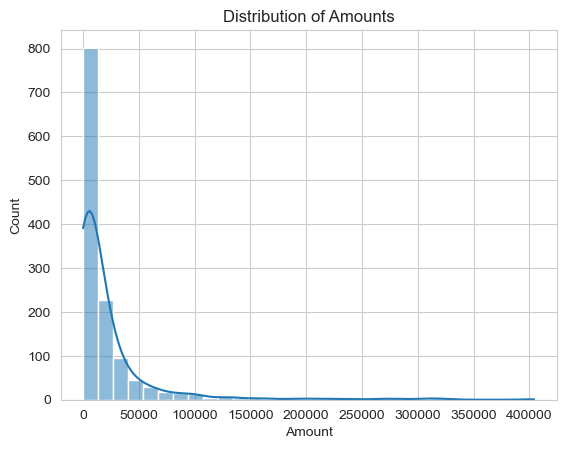

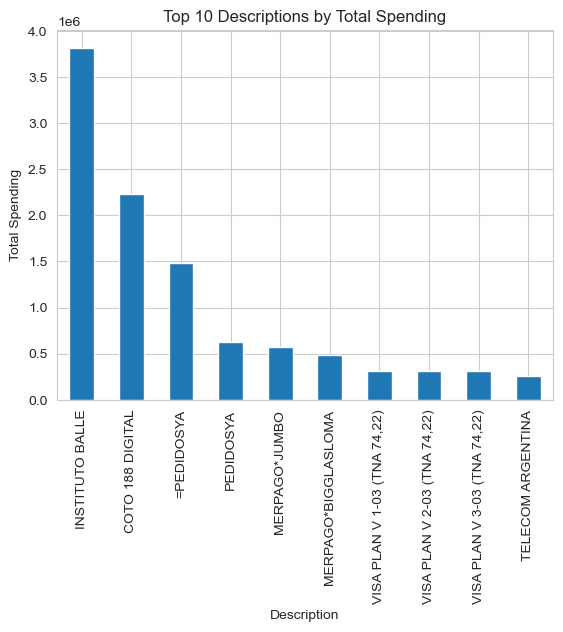

In [55]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Load combined data
df = pd.read_csv("/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv")

# Quick overview
print(df.info())
print(df.describe())

# Distribution of amounts
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Distribution of Amounts")
plt.show()

# Top descriptions by total spending
top_descriptions = df.groupby('Description')['Amount'].sum().nlargest(10)
top_descriptions.plot(kind='bar')
plt.title("Top 10 Descriptions by Total Spending")
plt.ylabel("Total Spending")
plt.show()


In [56]:
df['Description'].value_counts().head(30)

Description
=PEDIDOSYA                      78
=PEDIDOSYA _ PROPINA            53
PEDIDOSYA                       44
PEDIDOSYA _ PROPINA             22
INSTITUTO BALLE                 15
PEDIDOSYA - PROPINA             14
COTO 188 DIGITAL                14
TELECOM ARGENTINA               13
AGUA Y SANEAMIEN                13
=PEDIDOSYAPROPINA               12
MERCADOPAGO*QR                  10
MERPAGO*CAFEMARTINEZ            10
MERPAGO*BIGGLASLOMA              9
PEDIDOS YA - PROPINAS            9
WWW.SMILES.COM.AR                7
MERPAGO*CARREFOUR                6
MERPAGO*SAINJUANIGNAC            6
MERPAGO*JUMBO                    6
MERPAGO*MERCADOLIBRE C.02/06     6
MERPAGO*YPF                      6
PAGOSYA SA                       6
SMILES FIDELIDADE SMILES         6
MERPAGO*MERCADOLIBRE C.01/06     6
=PEDIDOSYA - PROPINA             5
DE SELLOS USD 0,00               5
MANT CTA Y RENO 15.619,83-       4
MERPAGO*MERCADOLIBRE C.03/06     4
IVA $ 21% 18.099,17 3.800,83     4
MERPAGO*

In [57]:
# Dictiorary to map descriptions to categories
description_to_category = {
    'NINTENDO': 'Entretenimiento',
    'MAS VISION': 'Ropa',
    'SUPERMERCADO': 'Supermercados',
    'GRISINO': 'Ropa',
    'HONKY': 'Ropa',
    'KEYBIS': 'Ropa',
    'SELU': 'Ropa',
    'PADEL': 'Entretenimiento',
    'DISNEY PLUS': 'Suscripciones',
    'VIAMO': 'Ropa',
    'AXION': 'Combustible',
    'CENCOSUD': 'Supermercados',
    'CRISTOBALC': 'Ropa',
    'NEVERLAND': 'Entretenimiento',
    'HAVANNA': 'Restaurantes',
    'BIGG': 'Suscripciones',
    'PUMAS': 'Ropa',
    'DEXTER': 'Ropa',
    'IVESS': 'Servicios Públicos',
    'HIPODROMO': 'Entretenimiento',
    'MCDONALD': 'McDonalds',
    'PEDIDOSYA': 'Delivery',
    'PROPINA': 'Delivery',
    'EDENOR': 'Servicios Públicos',
    'SMILES': 'Suscripciones',
    'RAPPI': 'Delivery',
    'CARREFOUR': 'Supermercados',
    'CAFEMARTINEZ': 'Restaurantes',
    'TELECOM': 'Servicios de Telecomunicaciones',
    'UBER': 'Transporte',
    'COTO': 'Supermercados',
    'MARKET CARAPACHAY': 'Supermercados',
    'PUMAENERGY': 'Combustible',
    'YPF': 'Combustible',
    'COMBUSTIBLE': 'Combustible',
    'JUMBO': 'Supermercados',
    'DISCO': 'Supermercados',
    'AZTECA DIGITAL': 'Electrónica',
    'MICROSOFT': 'Suscripciones',
    'ADOBE': 'Suscripciones',
    'GITHUB': 'Suscripciones',
    'APPLE': 'Suscripciones',
    'CREMOLATTI': 'Restaurantes',
    'GREEN EAT': 'Restaurantes',
    'BURGER KING': 'Restaurantes',
    'MC DONALD': 'Restaurantes',
    'PLAYLAND': 'Entretenimiento',
    'DLO': 'Delivery',
    'PAYU*AR*UBER': 'Transporte',
    ' C.': 'Cuotas',
    'MERPAGO': 'Pagos Mercado Pago',
    'OPENAI': 'Suscripciones',
    'CABIFY': 'Transporte',
    'BALLE': 'I BALLESTER',
    'AGUA Y': 'Servicios Públicos',
    'CABLEVISION': 'Servicios de Telecomunicaciones',
    'NETFLIX': 'Suscripciones',
    'SPOTIFY': 'Suscripciones',
    'AMAZON': 'Suscripciones',
    'CINEMARK': 'Entretenimiento',
    'SHELL': 'Combustible',
    'FARMACITY': 'Farmacias',
    'FARMACIA': 'Farmacias',
    'VISA PLAN': 'Pagos VISA',
    'ROCK FELLERS': 'Restaurantes',
    'SAMSHOP': 'Cuotas',
    'GMRA': 'Cuotas',
    'ZARA': 'Ropa',
    'PEDIDOS YA': 'Delivery',
    'INFRACC': 'Multas',
    'MERCADOPAGO': 'Pagos Mercado Pago',
    'AGOSTINA Y': 'Supermercados',
    'JOE S': 'Restaurantes',
    'TACO BOX': 'Restaurantes',
    'MERCPAGO': 'Pagos Mercado Pago'
}

# Paths to the files
file_visa_amex = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data.csv"
file_mc = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data_mc.csv"

# Load the data
visa_amex_df = pd.read_csv(file_visa_amex, usecols=["Date", "Description", "Amount", "File Name"])
mc_df = pd.read_csv(file_mc, usecols=["Date", "Description", "Amount", "File Name"])

# Append both tables
combined_df = pd.concat([visa_amex_df, mc_df], ignore_index=True)

# Ensure 'Category' column is added
combined_df['Category'] = combined_df['Description'].apply(
    lambda x: next((cat for desc, cat in description_to_category.items() if desc in x), "Other")
)

# Save the updated combined table with the new column
output_combined_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv"
combined_df.to_csv(output_combined_path, index=False)

print(f"Combined table with 'Category' column saved to {output_combined_path}")


Combined table with 'Category' column saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv


In [58]:
# Extracting Salario Base from PDFs
# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/recibos"

# List to store extracted data
data = []

# Loop through each PDF file in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing: {pdf_file}")

        # Generate the date based on the file name
        try:
            month_year = pdf_file.split()[1:3]  # Extract the month and year from the filename
            date_str = f"01/{month_year[0]}/{month_year[1]}"
        except IndexError:
            print(f"Could not extract date from filename: {pdf_file}")
            date_str = "N/A"

        # Open the PDF
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):
                text = page.extract_text()
                if text:
                    # Loop through each line in the text
                    for line in text.split("\n"):
                        # Check if the line contains "Salario Base"
                        if "Salario Base" in line:
                            # Split the line into parts (columns)
                            columns = line.split()
                            if len(columns) >= 3:  # Ensure there are at least 3 columns
                                # Extract the last column (salario base value)
                                salario_base_str = columns[-1]
                                try:
                                    salario_base = float(salario_base_str.replace('.', '').replace(',', '.'))
                                    data.append({
                                        "PDF File": pdf_file,
                                        "Page": page_number,
                                        "Salario Base": salario_base,
                                        "Date": date_str
                                    })
                                except ValueError:
                                    print(f"Could not convert value: {salario_base_str}")

# Print the results
if data:
    print("Extracted Salario Base values:")
    for record in data:
        print(record)
else:
    print("No Salario Base values found.")

# Save the results to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_salario_base.csv"
df = pd.DataFrame(data)
df.iloc[:, 3] = df.iloc[:, 3].str.replace('.pdf', '', regex=False)
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")


Processing: max 07 24.pdf
Processing: max 05 24.pdf
Processing: max 09 24.pdf
Processing: max 01 24.pdf
Processing: max 03 24.pdf
Processing: max 11 24.pdf
Processing: max 06 24.pdf
Processing: max 04 24.pdf
Processing: max 08 24.pdf
Processing: max 12 24.pdf
Processing: max 02 24.pdf
Processing: max 10 24.pdf
Extracted Salario Base values:
{'PDF File': 'max 07 24.pdf', 'Page': 1, 'Salario Base': 1805926.25, 'Date': '01/07/24.pdf'}
{'PDF File': 'max 05 24.pdf', 'Page': 1, 'Salario Base': 1805926.25, 'Date': '01/05/24.pdf'}
{'PDF File': 'max 09 24.pdf', 'Page': 1, 'Salario Base': 1986519.0, 'Date': '01/09/24.pdf'}
{'PDF File': 'max 01 24.pdf', 'Page': 1, 'Salario Base': 1064658.08, 'Date': '01/01/24.pdf'}
{'PDF File': 'max 03 24.pdf', 'Page': 1, 'Salario Base': 1570370.67, 'Date': '01/03/24.pdf'}
{'PDF File': 'max 11 24.pdf', 'Page': 1, 'Salario Base': 2085844.95, 'Date': '01/11/24.pdf'}
{'PDF File': 'max 06 24.pdf', 'Page': 1, 'Salario Base': 1805926.25, 'Date': '01/06/24.pdf'}
{'PDF F

In [59]:
# Extracting Supermarket data from emails
import email
from bs4 import BeautifulSoup

# Path to the folder containing emails
email_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/supermarket"

# List to store extracted data
data = []

# Process each email file in the folder
for email_file in os.listdir(email_folder):
    if email_file.endswith(".eml"):
        email_path = os.path.join(email_folder, email_file)
        print(f"Processing: {email_file}")

        # Open and parse the email file
        with open(email_path, "r", encoding="utf-8") as f:
            msg = email.message_from_file(f)
            
            # Get the email content
            for part in msg.walk():
                if part.get_content_type() == "text/html":
                    html_content = part.get_payload(decode=True).decode("utf-8")

                    # Parse HTML using BeautifulSoup
                    soup = BeautifulSoup(html_content, "html.parser")

                    # Find relevant tables or data in the email
                    table = soup.find("table")  # Assuming the table contains product data
                    if table:
                        rows = table.find_all("tr")

                        for row in rows:
                            columns = row.find_all("td")
                            if len(columns) >= 3:  # Ensure there are at least 3 columns
                                date = columns[0].get_text(strip=True)
                                description = columns[1].get_text(strip=True)
                                value = columns[2].get_text(strip=True)

                                # Clean and convert value to float
                                try:
                                    #value = float(value.replace('.', '').replace(',', '.'))
                                    data.append({
                                        "Email File": email_file,
                                        "Date": date,
                                        "Description": description,
                                        "Value": value
                                    })
                                except ValueError:
                                    print(f"Could not convert value: {value}")

# Print results
if data:
    print("Extracted data:")
    for record in data:
        print(record)
else:
    print("No data extracted from emails.")

# Save results to a CSV file
supermarket_output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/supermarket_data.csv"
df_supermarket = pd.DataFrame(data)
df_supermarket = df_supermarket[pd.to_numeric(df_supermarket['Value'], errors='coerce').notna()]
df_supermarket = df_supermarket[df_supermarket['Description'].str.match(r'^\$\d+(\.\d+)?$', na=False)] 
df_supermarket.to_csv(supermarket_output_path, index=False)
print(f"Data saved to {supermarket_output_path}")


Processing: 24-01-2025.eml
Extracted data:
{'Email File': '24-01-2025.eml', 'Date': '⚠ Este mail se generó automaticamente,por favor no lo respondas.¡Muchas gracias, Maximiliano!Tu pedido fue procesado.Información de tu compraDatos\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tGeneralesFecha del pedido24/01/2025 00:03hsClienteMaximiliano LascaForma de pagoAmerican ExpressDescuento Club La\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tNación6391300440877984Cupón\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tingresado---ObservacionesENVÍO A DOMICILIOPrecio del envío: $ 2099Código de entrega:1176Pedido\t\t\t\t\t\t\t\t\t\t\tNro:1802187072', 'Description': '⚠ Este mail se generó automaticamente,por favor no lo respondas.', 'Value': '⚠ Este mail se generó automaticamente,por favor no lo respondas.'}
{'Email File': '24-01-2025.eml', 'Date': '⚠ Este mail se generó automaticamente,por favor no lo respondas.', 'Description': '⚠ Este mail se generó automaticamente,por favor no lo respondas.', 'V

In [60]:
# Create Month column
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y-%m-%d')
combined_df['Month'] = combined_df['Date'].dt.month
combined_df.to_csv(output_combined_path, index=False)



df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Month'] = df['Date'].dt.month
df.to_csv(output_path, index=False)


df_supermarket.iloc[:, 0] = df_supermarket.iloc[:, 0].str.replace('.eml', '', regex=False)
df_supermarket.rename(columns={"Description": "Amount", "Date": "Description_", "Email File": "Date_"}, inplace=True)
df_supermarket.rename(columns={"Description_": "Description", "Date_": "Date"}, inplace=True)
df_supermarket['Date'] = pd.to_datetime(df_supermarket['Date'], format='%d-%m-%Y')
df_supermarket['Month'] = df_supermarket['Date'].dt.month
df_supermarket.to_csv(supermarket_output_path, index=False)

In [61]:
# Extracting SALDO ACTUAL from visa/amex PDFs

# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/raw_pdfs"

# List to store extracted data
saldo_actual_data = []

# Process each PDF in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing: {pdf_file}")

        # Open the PDF and process only the first page
        with pdfplumber.open(pdf_path) as pdf:
            page = pdf.pages[0]  # Only process the first page
            text = page.extract_text()
            if text:  # Check if text was extracted
                print(f"Page 1 of file {pdf_file} processed.")
                # Search for the line containing "SALDO ACTUAL"
                for line in text.split("\n"):
                    if "SALDO ACTUAL" in line.upper():
                        # Extract the amount using a regex pattern
                        match = re.search(r"SALDO ACTUAL.*?([\d.,]+)$", line.upper())
                        if match:
                            saldo = match.group(1)
                            # Ensure saldo is not empty before converting to float
                            if saldo:
                                saldo = float(saldo.replace(".", "").replace(",", "."))
                                saldo_actual_data.append({
                                    "File Name": pdf_file,
                                    "SALDO ACTUAL": saldo
                                })
                        else:
                            print(f"No amount found in line: {line}")
                        break  # Stop searching after finding the first match

# Convert to DataFrame
df_saldo_actual = pd.DataFrame(saldo_actual_data)

# Save to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/saldo_actual_data.csv"
df_saldo_actual.to_csv(output_path, index=False)
print(f"SALDO ACTUAL data saved to {output_path}")


Processing: visa 07 24.pdf
Page 1 of file visa 07 24.pdf processed.
Processing: Amex 11 24.pdf
Page 1 of file Amex 11 24.pdf processed.
Processing: Amex 03 24.pdf
Page 1 of file Amex 03 24.pdf processed.
Processing: Amex 01 25.pdf
Page 1 of file Amex 01 25.pdf processed.
Processing: Amex 01 24.pdf
Page 1 of file Amex 01 24.pdf processed.
Processing: visa 05 24.pdf
Page 1 of file visa 05 24.pdf processed.
Processing: visa 09 24.pdf
Page 1 of file visa 09 24.pdf processed.
Processing: Amex 09 24.pdf
Page 1 of file Amex 09 24.pdf processed.
Processing: Amex 05 24.pdf
Page 1 of file Amex 05 24.pdf processed.
Processing: visa 01 25.pdf
Page 1 of file visa 01 25.pdf processed.
Processing: visa 01 24.pdf
Page 1 of file visa 01 24.pdf processed.
Processing: visa 03 24.pdf
Page 1 of file visa 03 24.pdf processed.
Processing: visa 11 24.pdf
Page 1 of file visa 11 24.pdf processed.
Processing: Amex 07 24.pdf
Page 1 of file Amex 07 24.pdf processed.
Processing: Amex 10 24.pdf
Page 1 of file Amex 1

In [62]:
# Extracting SALDO ACTUAL from MC PDFs

# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/mc"

# List to store extracted data
saldo_actual_data = []

# Process each PDF in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing: {pdf_file}")

        # Open the PDF and process only the first page
        with pdfplumber.open(pdf_path) as pdf:
            page = pdf.pages[0]  # Only process the first page
            text = page.extract_text()
            if text:  # Check if text was extracted
                print(f"Page 1 of file {pdf_file} processed.")
                # Search for the line containing "SALDO ACTUAL"
                for line in text.split("\n"):
                    if "SALDO ACTUAL" in line.upper():
                        # Extract the $ amount only, ignoring U$S
                        match = re.search(r"SALDO ACTUAL.*?\$ ([\d.,]+)", line.upper())
                        if match:
                            saldo = match.group(1)  # Extract the $ amount
                            # Ensure saldo is not empty before converting to float
                            if saldo:
                                saldo = float(saldo.replace(".", "").replace(",", "."))
                                saldo_actual_data.append({
                                    "File Name": pdf_file,
                                    "SALDO ACTUAL": saldo
                                })
                        else:
                            print(f"No valid $ amount found in line: {line}")
                        break  # Stop searching after finding the first match

# Convert to DataFrame
df_saldo_actual = pd.DataFrame(saldo_actual_data)

# Save to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/saldo_actual_data_mc.csv"
df_saldo_actual.to_csv(output_path, index=False)
print(f"SALDO ACTUAL data saved to {output_path}")


Processing: mc 07 24.pdf
Page 1 of file mc 07 24.pdf processed.
Processing: mc 05 24.pdf
Page 1 of file mc 05 24.pdf processed.
Processing: mc 09 24.pdf
Page 1 of file mc 09 24.pdf processed.
Processing: mc 01 24.pdf
Page 1 of file mc 01 24.pdf processed.
Processing: mc 01 25.pdf
Page 1 of file mc 01 25.pdf processed.
Processing: mc 03 24.pdf
Page 1 of file mc 03 24.pdf processed.
Processing: mc 11 24.pdf
Page 1 of file mc 11 24.pdf processed.
Processing: mc 06 24.pdf
Page 1 of file mc 06 24.pdf processed.
Processing: mc 04 24.pdf
Page 1 of file mc 04 24.pdf processed.
Processing: mc 08 24.pdf
Page 1 of file mc 08 24.pdf processed.
Processing: mc 12 24.pdf
Page 1 of file mc 12 24.pdf processed.
Processing: mc 02 24.pdf
Page 1 of file mc 02 24.pdf processed.
Processing: mc 10 24.pdf
Page 1 of file mc 10 24.pdf processed.
SALDO ACTUAL data saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/saldo_actual_data_mc.csv


In [63]:
# Compile SALDO ACTUAL from Visa/Amex and MC

# Paths to the files
file_visa_amex = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/saldo_actual_data.csv"
file_mc = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/saldo_actual_data_mc.csv"

# Load the data
visa_amex_df = pd.read_csv(file_visa_amex, usecols=["File Name", "SALDO ACTUAL"])
mc_df = pd.read_csv(file_mc, usecols=["File Name", "SALDO ACTUAL"])

# Append both tables
combined_df = pd.concat([visa_amex_df, mc_df], ignore_index=True)

# Save the combined table to a new CSV file
output_combined_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data_saldo.csv"
combined_df.to_csv(output_combined_path, index=False)

print(f"Combined table saved to {output_combined_path}")


Combined table saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data_saldo.csv


In [64]:
# Add a new column "Month" to the existing DataFrame
combined_df["Month"] = combined_df["File Name"].apply(
    lambda x: x[-9:-7] if len(x) >= 9 else "Unknown"  # Ensure the filename has enough characters
)

# Save the updated DataFrame to a new CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data_saldo.csv"
combined_df.to_csv(output_path, index=False)

print(f"Updated data with months saved to {output_path}")

Updated data with months saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data_saldo.csv
